<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
</font>
</h1>
<h1 align=center color="#0099cc">
CHW3
</h1>

<h2 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
امیرحسین صفری
</h2>



<hr>

## c5

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا کتابخانه های موردنیاز را لود می کنیم 
</font>
</p>

In [22]:
# import libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm 
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [23]:
def plot_confusion(confusion_array, title):
    df = pd.DataFrame(confusion_array)
    plt.title(title)
    s = sn.heatmap(df, annot=True,cmap='YlGn', annot_kws={"size": 14}) # font size
    s.set_xlabel("prediction label", fontsize = 20)
    s.set_ylabel("true label", fontsize = 20)

In [24]:
# load and split data:
data = pd.read_csv (r'fashion-mnist.csv')  
data = data.to_numpy()

# shuffle data randomly
np.random.shuffle(data)

x = data[:, 0:data.shape[1] - 1]
y = data[:, data.shape[1] - 1]

x_s = x[0:int(np.ceil(0.5*x.shape[0])), :]
y_s = y[0:int(np.ceil(0.5*y.shape[0]))]

x_v = x[int(np.ceil(0.5*x.shape[0])):int(np.ceil(0.85*x.shape[0])), :]
y_v = y[int(np.ceil(0.5*y.shape[0])):int(np.ceil(0.85*y.shape[0]))]

x_t = x[int(np.ceil(0.85*x.shape[0])):, :]
y_t = y[int(np.ceil(0.85*y.shape[0])):]

### method 1: SVM with linear kernel

In [25]:
# fit model:
svm_lin = svm.SVC(kernel='linear').fit(x_s, y_s)

accuracy on validation data with linear svm = 82.10542459385863 % 


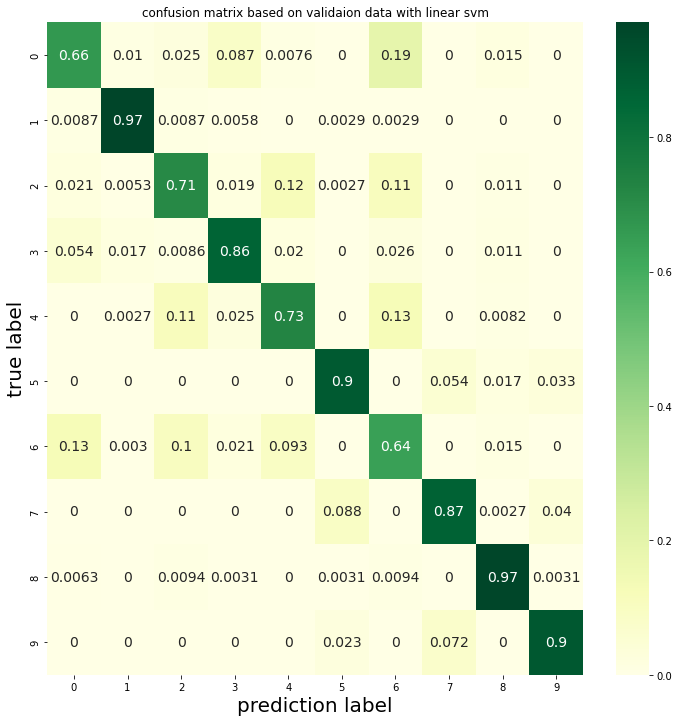

In [26]:
# apply model to validation data
svm_lin_y_v_predict = svm_lin.predict(x_v)

# find confusion matrix based on predict and validation:
svm_lin_conf_v = confusion_matrix(svm_lin_y_v_predict, y_v,labels=svm_lin.classes_, normalize='true')

# find accuracy based on confusion matrix on validation data: 
svm_lin_acc_v = np.sum(svm_lin_conf_v.diagonal()) / np.sum(svm_lin_conf_v) * 100

# print accuracy and plot confusion matrix
print(f"accuracy on validation data with linear svm = {svm_lin_acc_v} % ")
plt.figure(figsize=(12, 12))
plot_confusion(svm_lin_conf_v, 'confusion matrix based on validaion data with linear svm')

accuracy on test data with linear svm = 80.54693591295788 % 


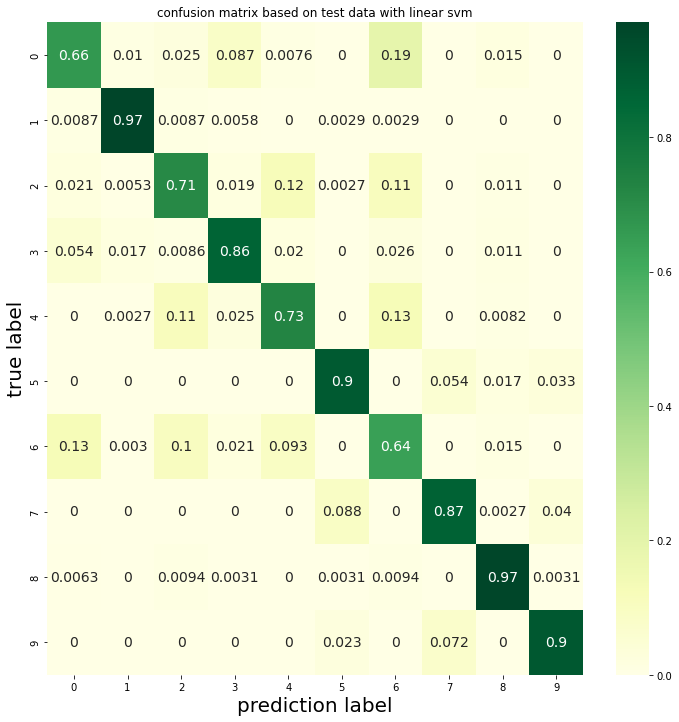

In [27]:
# apply model to test data
svm_lin_y_t_predict = svm_lin.predict(x_t)

# find confusion matrix based on predict and test:
svm_lin_conf_t = confusion_matrix(svm_lin_y_t_predict, y_t,labels=svm_lin.classes_, normalize='true')

# find accuracy based on confusion matrix on test data: 
svm_lin_acc_t = np.sum(svm_lin_conf_t.diagonal()) / np.sum(svm_lin_conf_t) * 100

# print accuracy and plot confusion matrix
print(f"accuracy on test data with linear svm = {svm_lin_acc_t} % ")
plt.figure(figsize=(12, 12))
plot_confusion(svm_lin_conf_v, 'confusion matrix based on test data with linear svm')

### method 2: SVM with RBF kernel

In [28]:
# find best value for sigma based on result on validation data:
# iterate sigma from 10^(-10) to 10^(5)
sigma_values = np.logspace(-10, 0, 10)
best_sigma = 0
best_acc = 0
for sigma in sigma_values:
    svm_rbf = svm.SVC(kernel='rbf', gamma=sigma).fit(x_s, y_s)

    # find confustion matrix and accuracy:
    svm_rbf_y_v_predict = svm_rbf.predict(x_v)

    # find confusion matrix based on predict and validation:
    svm_rbf_conf_v = confusion_matrix(svm_rbf_y_v_predict, y_v,labels=svm_rbf.classes_, normalize='true')

    # find accuracy based on confusion matrix on validation data: 
    svm_rbf_acc_v = np.sum(svm_rbf_conf_v.diagonal()) / np.sum(svm_rbf_conf_v) * 100

    if svm_rbf_acc_v > best_acc:
        best_acc = svm_rbf_acc_v
        best_sigma = sigma

    print(sigma)



1e-10
1.2915496650148826e-09
1.6681005372000592e-08
2.1544346900318867e-07
2.782559402207126e-06
3.5938136638046256e-05
0.0004641588833612782
0.005994842503189421
0.07742636826811278
1.0


best sigma = 2.1544346900318867e-07
accuracy on validation data with RBF svm = 85.48151273756804 % 
accuracy on test data with RBF svm = 84.7640840611963 % 


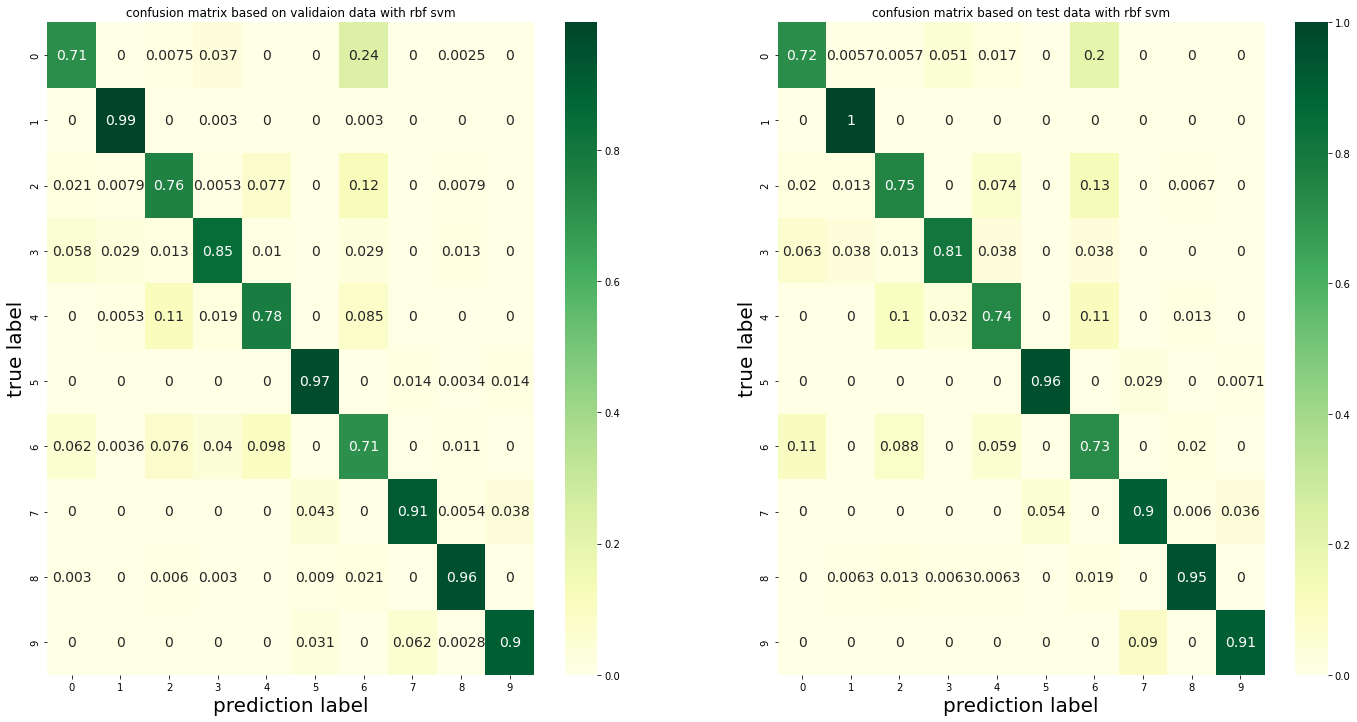

In [29]:
# with best_sigma train model:
svm_rbf = svm.SVC(kernel='rbf', gamma=best_sigma).fit(x_s, y_s)

# predict label on validation and test
svm_rbf_y_v_predict = svm_rbf.predict(x_v)
svm_rbf_y_t_predict = svm_rbf.predict(x_t)

# find confusion matrix validation and test data:
svm_rbf_conf_v = confusion_matrix(svm_rbf_y_v_predict, y_v,labels=svm_rbf.classes_, normalize='true')
svm_rbf_conf_t = confusion_matrix(svm_rbf_y_t_predict, y_t,labels=svm_rbf.classes_, normalize='true')

# find accuracy based on confusion matrix on validation data: 
svm_rbf_acc_v = np.sum(svm_rbf_conf_v.diagonal()) / np.sum(svm_rbf_conf_v) * 100
svm_rbf_acc_t = np.sum(svm_rbf_conf_t.diagonal()) / np.sum(svm_rbf_conf_t) * 100

# print results and plot confusion matrix:
print(f'best sigma = {best_sigma}')
print(f"accuracy on validation data with RBF svm = {svm_rbf_acc_v} % ")
print(f"accuracy on test data with RBF svm = {svm_rbf_acc_t} % ")

fig = plt.figure(figsize=(24, 12))
plt.subplot(121)
plot_confusion(svm_rbf_conf_v, 'confusion matrix based on validaion data with rbf svm')
plt.subplot(122)
plot_confusion(svm_rbf_conf_t, 'confusion matrix based on test data with rbf svm')

### method 3: K-nearest-neighbor

In [30]:
# find best k for find best result on validation data:
# iterate k from 1 to 30
k_values = np.arange(1, 30, 1)
best_k = 0
best_acc = 0
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k ,metric='euclidean')
    knn_model.fit(x_s, y_s)

    # find confustion matrix and accuracy:
    knn_model_y_v_predict = knn_model.predict(x_v)

    # find confusion matrix based on predict and validation:
    knn_model_conf_v = confusion_matrix(knn_model_y_v_predict, y_v,labels=knn_model.classes_, normalize='true')

    # find accuracy based on confusion matrix on validation data: 
    knn_model_acc_v = np.sum(knn_model_conf_v.diagonal()) / np.sum(knn_model_conf_v) * 100

    if knn_model_acc_v > best_acc:
        best_acc = knn_model_acc_v
        best_k = k

best k = 6
accuracy on validation data with k_nearest_neighbors = 78.72956947071319 % 
accuracy on test data with k_nearest_neighbors = 79.37333254196072 % 


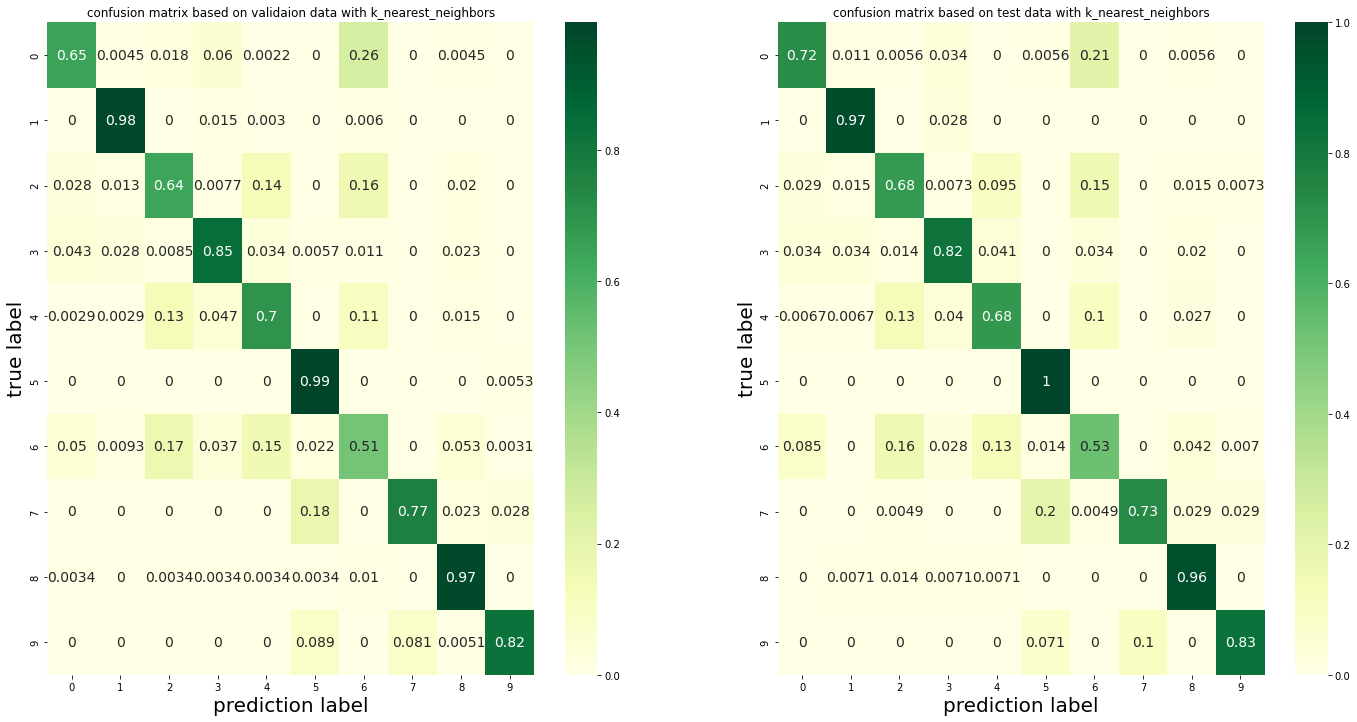

In [31]:
# with best_k train model:
knn_model = KNeighborsClassifier(n_neighbors=k ,metric='euclidean')
knn_model.fit(x_s, y_s)

# predict label on validation and test
knn_model_y_v_predict = knn_model.predict(x_v)
knn_model_y_t_predict = knn_model.predict(x_t)

# find confusion matrix validation and test data:
knn_model_conf_v = confusion_matrix(knn_model_y_v_predict, y_v,labels=knn_model.classes_, normalize='true')
knn_model_conf_t = confusion_matrix(knn_model_y_t_predict, y_t,labels=knn_model.classes_, normalize='true')

# find accuracy based on confusion matrix on validation data: 
knn_model_acc_v = np.sum(knn_model_conf_v.diagonal()) / np.sum(knn_model_conf_v) * 100
knn_model_acc_t = np.sum(knn_model_conf_t.diagonal()) / np.sum(knn_model_conf_t) * 100

# print results and plot confusion matrix:
print(f'best k = {best_k}')
print(f"accuracy on validation data with k_nearest_neighbors = {knn_model_acc_v} % ")
print(f"accuracy on test data with k_nearest_neighbors = {knn_model_acc_t} % ")

fig = plt.figure(figsize=(24, 12))
plt.subplot(121)
plot_confusion(knn_model_conf_v, 'confusion matrix based on validaion data with k_nearest_neighbors')
plt.subplot(122)
plot_confusion(knn_model_conf_t, 'confusion matrix based on test data with k_nearest_neighbors')


### method 4: Decision tree

accuracy on validation data with Decision tree = 74.35984780478528 % 
accuracy on test data with Decision tree = 73.1222741412107 % 


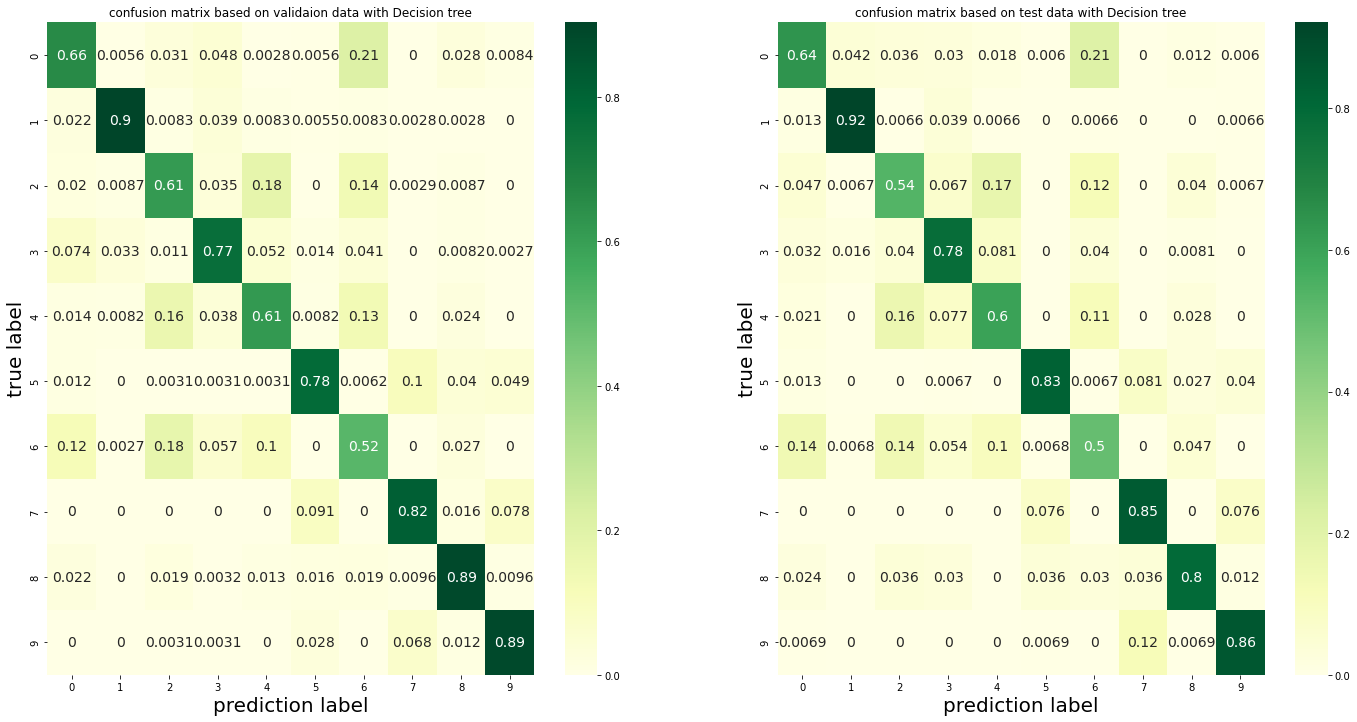

In [32]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_s, y_s)

# predict label on validation and test
tree_model_y_v_predict = tree_model.predict(x_v)
tree_model_y_t_predict = tree_model.predict(x_t)

# find confusion matrix validation and test data:
tree_model_conf_v = confusion_matrix(tree_model_y_v_predict, y_v,labels=tree_model.classes_, normalize='true')
tree_model_conf_t = confusion_matrix(tree_model_y_t_predict, y_t,labels=tree_model.classes_, normalize='true')

# find accuracy based on confusion matrix on validation data: 
tree_model_acc_v = np.sum(tree_model_conf_v.diagonal()) / np.sum(tree_model_conf_v) * 100
tree_model_acc_t = np.sum(tree_model_conf_t.diagonal()) / np.sum(tree_model_conf_t) * 100

# print results and plot confusion matrix:
print(f"accuracy on validation data with Decision tree = {tree_model_acc_v} % ")
print(f"accuracy on test data with Decision tree = {tree_model_acc_t} % ")

fig = plt.figure(figsize=(24, 12))
plt.subplot(121)
plot_confusion(tree_model_conf_v, 'confusion matrix based on validaion data with Decision tree')
plt.subplot(122)
plot_confusion(tree_model_conf_t, 'confusion matrix based on test data with Decision tree')

### method 5: neural network

In [33]:
# first of all use OneHotEncoder for making y suitable for train neural network:
ohe = OneHotEncoder()
ohe_y_s = ohe.fit_transform(y_s.reshape(-1,1)).toarray()
ohe_y_v = ohe.fit_transform(y_v.reshape(-1,1)).toarray()
ohe_y_t = ohe.fit_transform(y_t.reshape(-1,1)).toarray()

In [34]:
# I use keras for making neural network model:
# find best activation function from [sigmoid, relu, tanh] for find best result on validation data:
# for all neworks we consider (softmax) for activation fuction in last layer
activation_funcs = ['sigmoid', 'relu', 'tanh']
accuracies = []
input_dim = x_s.shape[1]
best_activation = ''
best_acc = 0
for active_func in activation_funcs:
    nn_model = Sequential()
    nn_model.add(Dense(100, input_dim = input_dim, activation = active_func)) ## make first hidden layer
    nn_model.add(Dense(100, activation = active_func)) ## make second hidden layer
    nn_model.add(Dense(10, activation='softmax')) ## make output layer(we have 10 classes in output)

    # determine loss function and optimizer:
    nn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    # train network:
    nn_model_history = nn_model.fit(x_s, ohe_y_s, batch_size=None, validation_data=(x_v, ohe_y_v), epochs=100)

    # predict validation data label:
    pred = nn_model.predict(x_v)  # pred contains value that show softmax result for each label
    
    # convert predictions to label:
    nn_model_y_v_predict = []
    for i in range(pred.shape[0]):
        nn_model_y_v_predict.append(np.argmax(pred[i]))
        
    # find accuracy based on validation data: 
    nn_model_acc_v = accuracy_score(nn_model_y_v_predict, y_v)
    accuracies.append(nn_model_acc_v)

    if nn_model_acc_v > best_acc:
        best_acc = nn_model_acc_v
        best_activation = active_func

Epoch 1/100
157/157 [==============================] - 1s 4ms/step - loss: 2.1646 - accuracy: 0.3086 - val_loss: 2.0332 - val_accuracy: 0.4320
Epoch 2/100
157/157 [==============================] - 0s 3ms/step - loss: 1.9403 - accuracy: 0.4854 - val_loss: 1.8592 - val_accuracy: 0.4926
Epoch 3/100
157/157 [==============================] - 0s 3ms/step - loss: 1.7725 - accuracy: 0.5528 - val_loss: 1.6983 - val_accuracy: 0.5326
Epoch 4/100
157/157 [==============================] - 0s 3ms/step - loss: 1.6129 - accuracy: 0.5964 - val_loss: 1.5483 - val_accuracy: 0.6014
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: 1.4717 - accuracy: 0.6464 - val_loss: 1.4233 - val_accuracy: 0.6474
Epoch 6/100
157/157 [==============================] - 0s 3ms/step - loss: 1.3467 - accuracy: 0.6804 - val_loss: 1.3074 - val_accuracy: 0.6431
Epoch 7/100
157/157 [==============================] - 0s 3ms/step - loss: 1.2428 - accuracy: 0.6954 - val_loss: 1.2171 - val_accuracy: 0.6906

result: best activation for hidden layer function is sigmoid function

In [36]:
# after finding best activation function again find nn network
print(f'best activation function is {best_activation}')

nn_model = Sequential()
nn_model.add(Dense(100, input_dim = input_dim, activation = best_activation)) ## make first hidden layer
nn_model.add(Dense(100, activation = best_activation)) ## make second hidden layer
nn_model.add(Dense(10, activation='softmax')) ## make output layer(we have 10 classes in output)

# determine loss function and optimizer:
nn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train network:
nn_model_history = nn_model.fit(x_s, ohe_y_s, validation_data=(x_v, ohe_y_v), batch_size=None, epochs=100)


best activation function is sigmoid
Epoch 1/100
157/157 [==============================] - 1s 3ms/step - loss: 2.1800 - accuracy: 0.3552 - val_loss: 2.0034 - val_accuracy: 0.4869
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 1.8964 - accuracy: 0.5538 - val_loss: 1.8075 - val_accuracy: 0.5569
Epoch 3/100
157/157 [==============================] - 0s 3ms/step - loss: 1.7068 - accuracy: 0.6078 - val_loss: 1.6314 - val_accuracy: 0.5809
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 1.5469 - accuracy: 0.6276 - val_loss: 1.4859 - val_accuracy: 0.6131
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: 1.4095 - accuracy: 0.6438 - val_loss: 1.3704 - val_accuracy: 0.6240
Epoch 6/100
157/157 [==============================] - 0s 3ms/step - loss: 1.3023 - accuracy: 0.6494 - val_loss: 1.2693 - val_accuracy: 0.6480
Epoch 7/100
157/157 [==============================] - 0s 3ms/step - loss: 1.2087 - accuracy: 0.6732 - val

In [37]:
# print accuracy for validation and test data
# predict validation data label:
v_pred = nn_model.predict(x_v)  # pred contains value that show softmax result for each label
t_pred = nn_model.predict(x_t)

# convert predictions to label:
nn_model_y_v_predict = []
nn_model_y_t_predict = []
for i in range(v_pred.shape[0]):
    nn_model_y_v_predict.append(np.argmax(v_pred[i]))

for i in range(t_pred.shape[0]):
    nn_model_y_t_predict.append(np.argmax(t_pred[i]))
    
# find accuracies: 
nn_model_acc_v = accuracy_score(nn_model_y_v_predict, y_v)
nn_model_acc_t = accuracy_score(nn_model_y_t_predict, y_t)

print(f'accuracy on validation data = {nn_model_acc_v*100} percent')
print(f'accuracy on test data = {nn_model_acc_t*100} percent')

accuracy on validation data = 77.45714285714286 percent
accuracy on test data = 76.93333333333334 percent


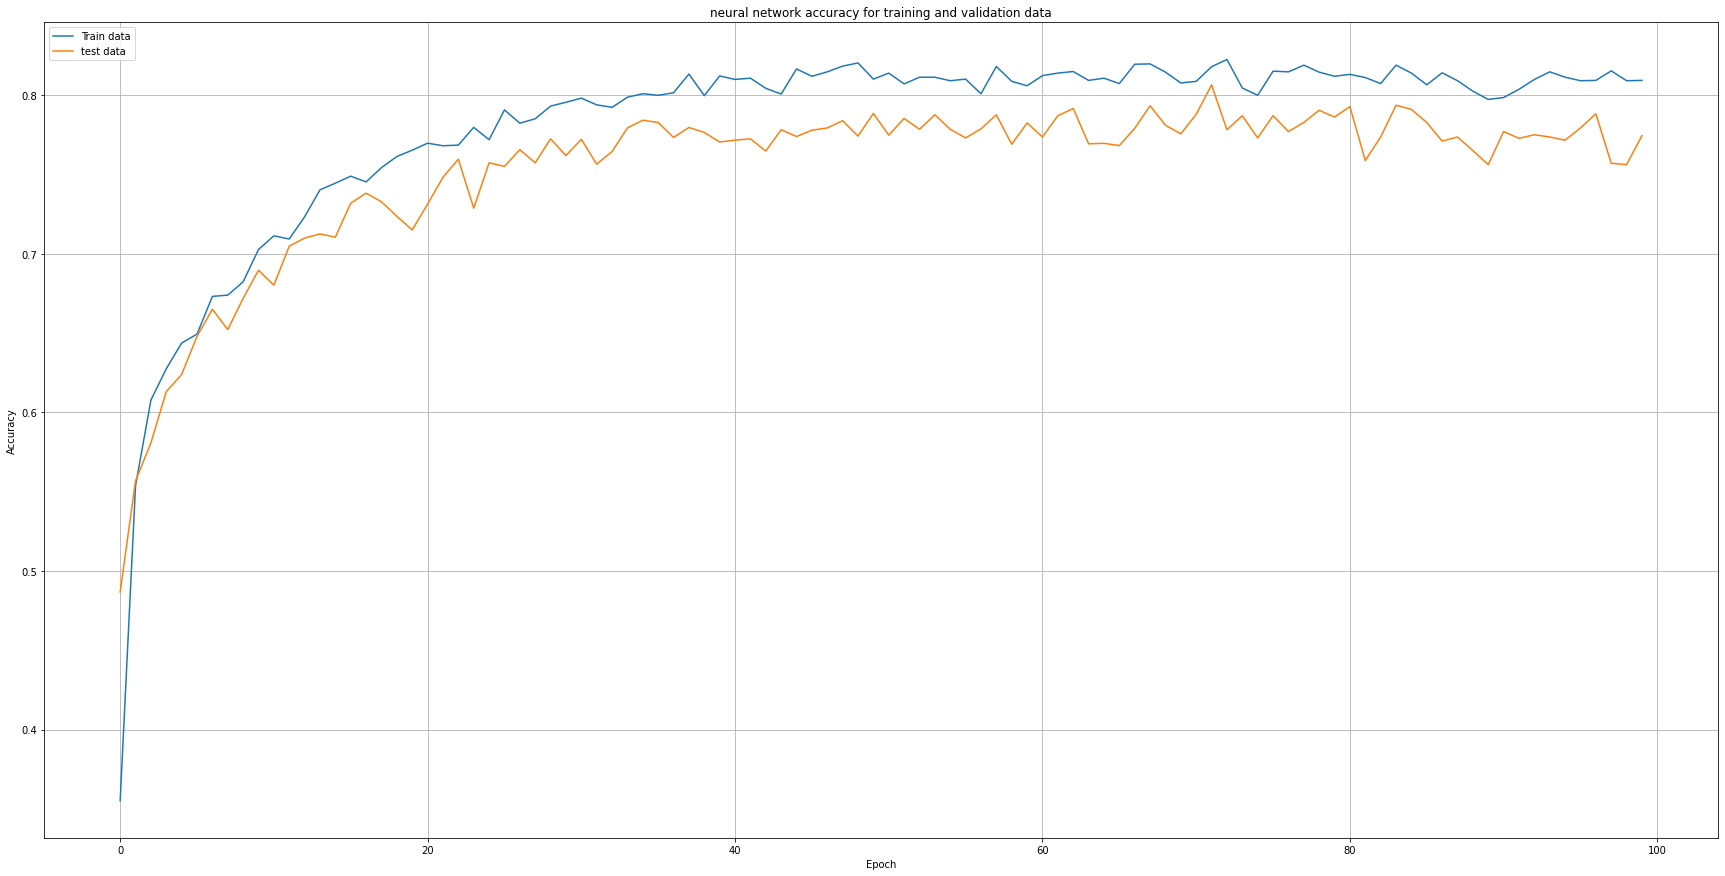

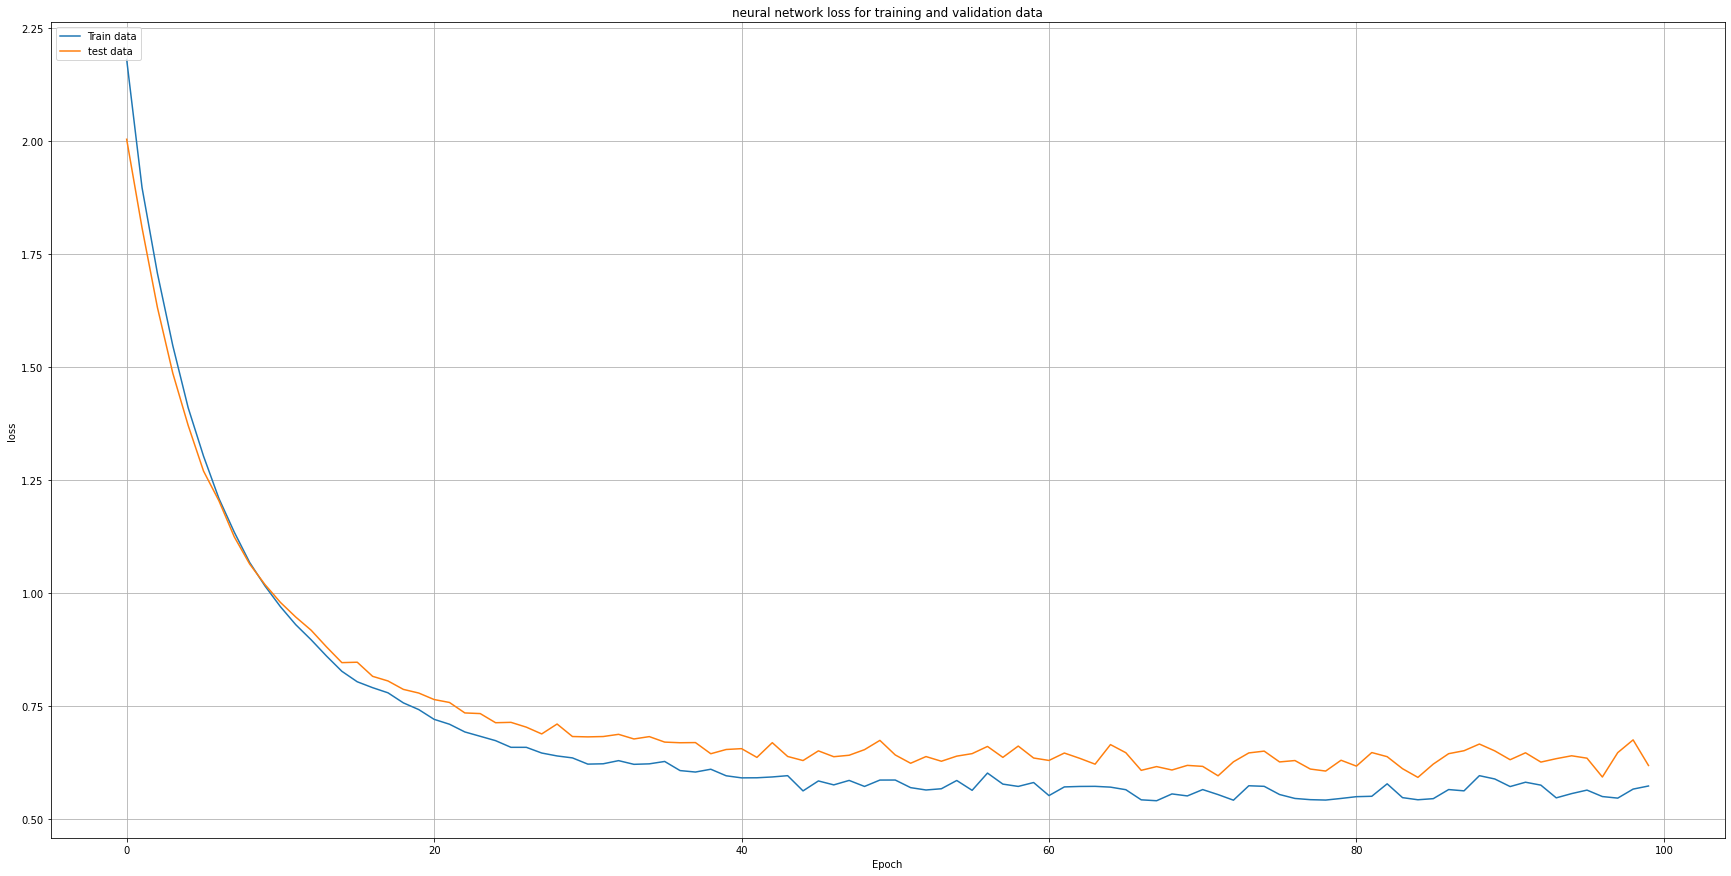

In [38]:
# plot validation and training accuracy vs batch
plt.figure(figsize=(30,15))
plt.plot(nn_model_history.history['accuracy'])
plt.plot(nn_model_history.history['val_accuracy'])
plt.title('neural network accuracy for training and validation data')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train data', 'test data'], loc='upper left')
plt.grid()
plt.show()

# plot validation and training loss vs batch
plt.figure(figsize=(30,15))
plt.plot(nn_model_history.history['loss'])
plt.plot(nn_model_history.history['val_loss'])
plt.title('neural network loss for training and validation data')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train data', 'test data'], loc='upper left')
plt.grid()
plt.show()